In [49]:
library(tidyverse)

library(grid)
library(gridExtra)

source("/home/yuliya/repos/other/removeBatch/evaluation_utils/plots_eda.R")

# Load data

In [50]:
central_uncorrected <- list()
central_corrected <- list()
metadata <- list()

data_path <- "/home/yuliya/repos/other/removeBatch/evaluation_data/proteomics/"

for (mode in c("balanced", "imbalanced")){
    central_corrected[[mode]] <- read.csv(paste0(data_path, "after/", mode, "/central_intensities_log_filtered_corrected.tsv"), sep = "\t", header = TRUE, row.names = 1, check.names = F)
    central_uncorrected[[mode]] <- read.csv(paste0(data_path, "before/", mode, "/central_intensities_log_filtered.tsv"), sep = "\t", header = TRUE, row.names = 1, check.names = F)
    metadata[[mode]] <- read.csv(paste0(data_path, "before/", mode, "/central_batch_info.tsv"), sep = "\t", header = TRUE, row.names = 1)

    # remove X from row names
    rownames(metadata[[mode]]) <- gsub("X", "", rownames(metadata[[mode]]))
    metadata[[mode]]$file <- rownames(metadata[[mode]])
    # order the columns in intensity dataframes
    central_corrected[[mode]] <- central_corrected[[mode]][, rownames(metadata[[mode]])]
    central_uncorrected[[mode]] <- central_uncorrected[[mode]][, rownames(metadata[[mode]])]

    cat("Loaded data for", mode, lab, "\n")
    cat("Central corrected:", nrow(central_corrected[[mode]]), "rows\n")
    cat("Central uncorrected:", nrow(central_uncorrected[[mode]]), "rows\n")
    cat("Sample metadata:", nrow(metadata[[mode]]), "rows\n\n")

}


Loaded data for balanced lab_A 
Central corrected: 2273 rows
Central uncorrected: 2273 rows
Sample metadata: 118 rows

Loaded data for imbalanced lab_A 
Central corrected: 2272 rows
Central uncorrected: 2272 rows
Sample metadata: 73 rows



# Checks

## Diagnostic plots

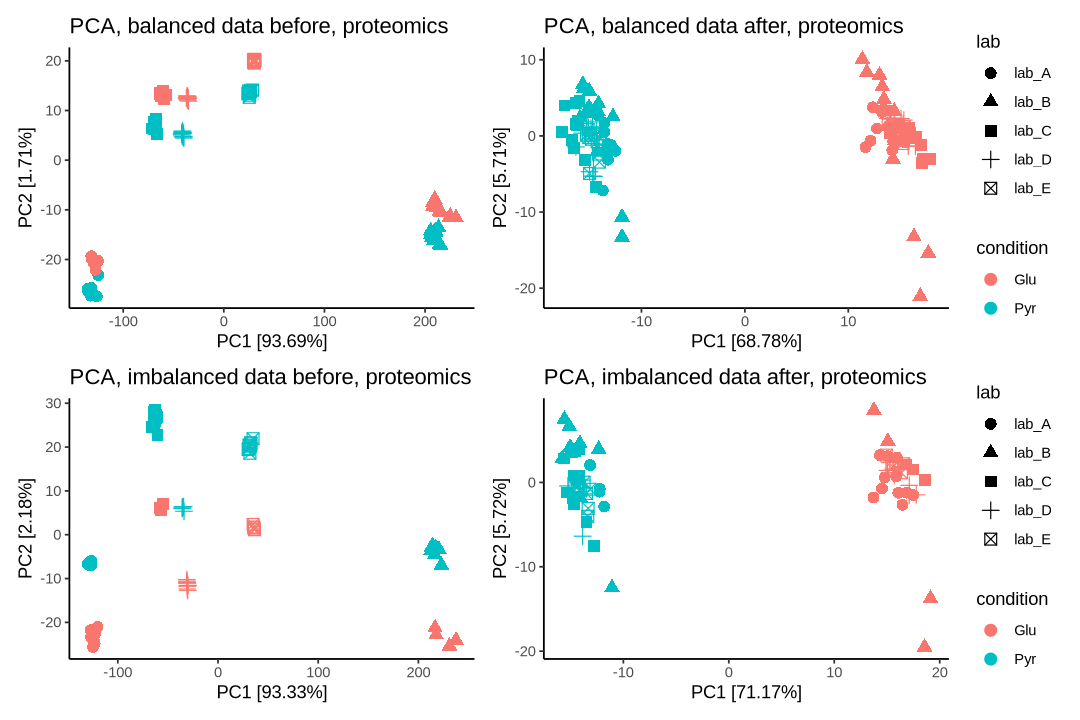

In [107]:
pca_plot_uncorrected <- list()
pca_plot_corrected <- list()

for(mode in c("balanced", "imbalanced")){
    pca_plot_uncorrected[[mode]] <- pca_plot(central_uncorrected[[mode]], metadata[[mode]], 
        title = paste("PCA,", mode, "data before, proteomics"),
        quantitative_col_name = "file", col_col = "condition", shape_col="lab", show_legend=F)
    pca_plot_corrected[[mode]] <- pca_plot(central_corrected[[mode]], metadata[[mode]], 
        title = paste("PCA,", mode, "data after, proteomics"),
        quantitative_col_name = "file", col_col = "condition", shape_col="lab", show_legend=T)
}

layout <- (pca_plot_uncorrected[['balanced']] + pca_plot_corrected[['balanced']]) /
            (pca_plot_uncorrected[['imbalanced']] + pca_plot_corrected[['imbalanced']])  

options(repr.plot.width=9, repr.plot.height=6)
layout

Warning message:
“Removed 1778 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_summary()`).”


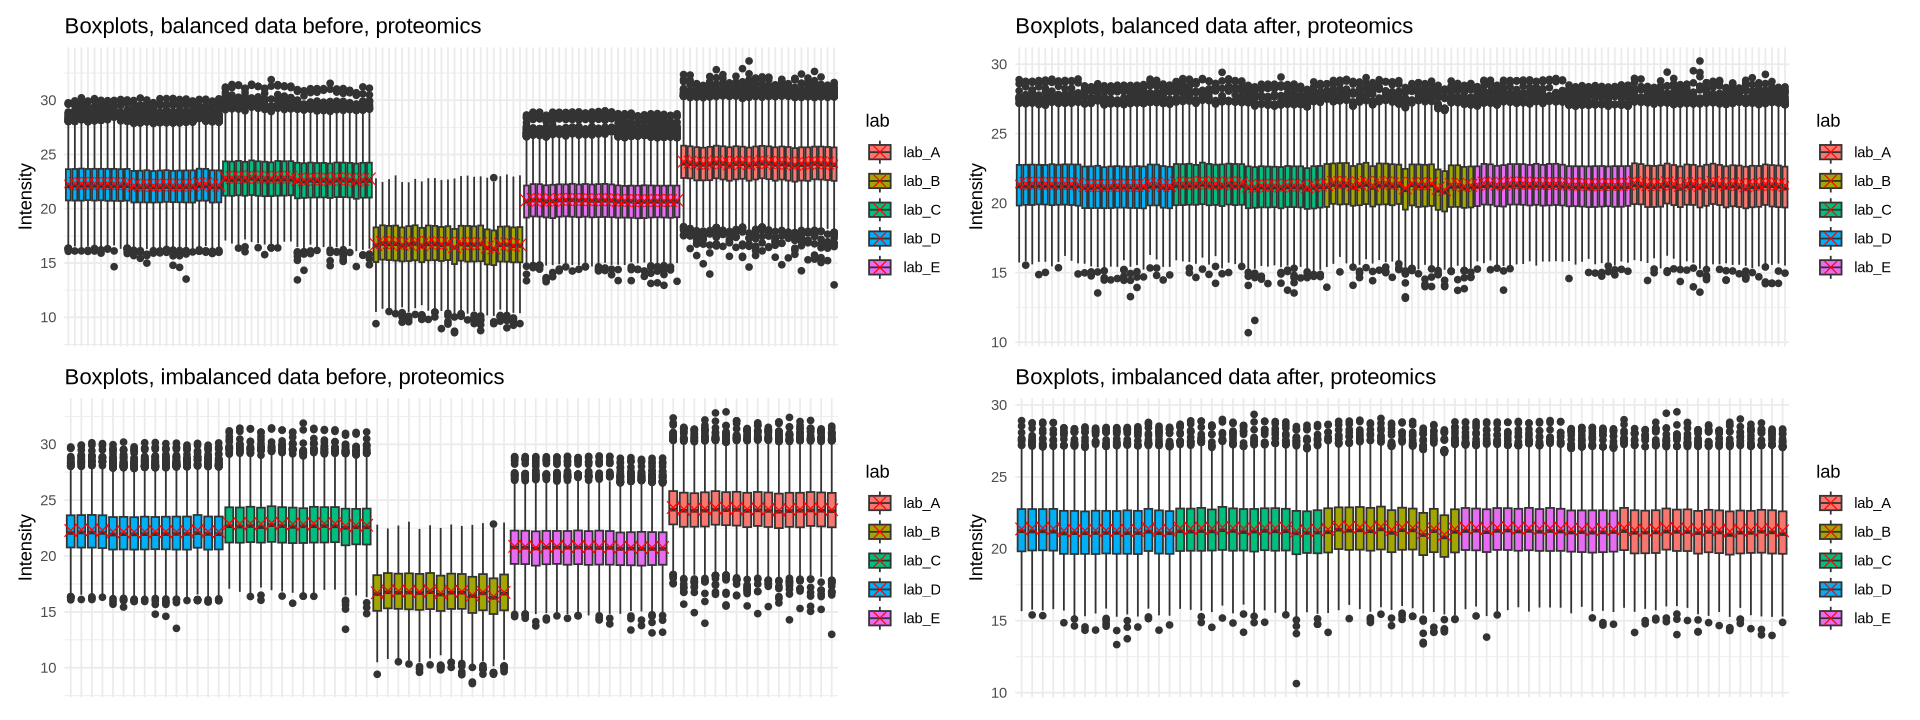

In [53]:
boxplots_uncorrected <- list()
boxplots_corrected <- list()

for(mode in c("balanced", "imbalanced")){
    boxplots_uncorrected[[mode]] <- boxplot_plot(central_uncorrected[[mode]], metadata[[mode]], 
        title = paste("Boxplots,", mode, "data before, proteomics"),
        quantitativeColumnName = "file",
        color_col = "lab", remove_xnames = T)
    boxplots_corrected[[mode]] <- boxplot_plot(central_corrected[[mode]], metadata[[mode]], 
        title = paste("Boxplots,", mode, "data after, proteomics"),
        quantitativeColumnName = "file",
        color_col = "lab", remove_xnames = T)
}

layout <- (boxplots_uncorrected[['balanced']] + boxplots_corrected[['balanced']]) /
            (boxplots_uncorrected[['imbalanced']] + boxplots_corrected[['imbalanced']])

options(repr.plot.width=16, repr.plot.height=6)
layout

No id variables; using all as measure variables



No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

Warning message:
“Removed 1778 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 1778 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 1011 rows containing non-finite values (`stat_density()`).”


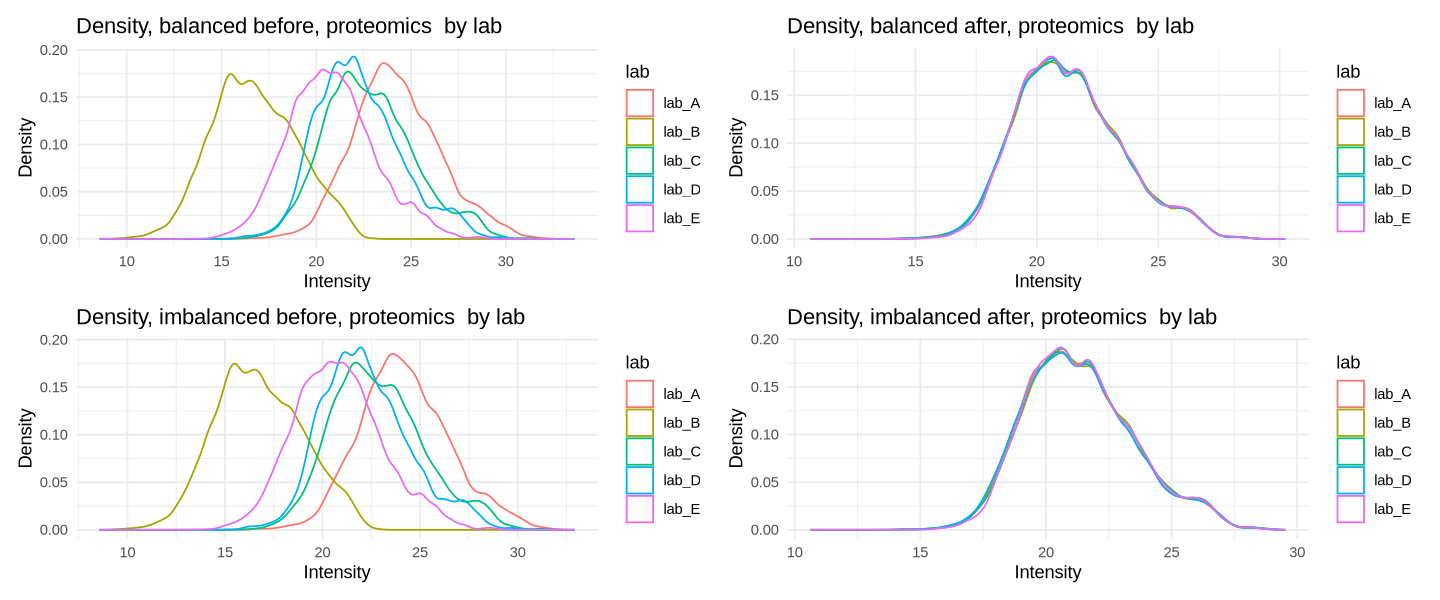

In [108]:
density_plots_uncorrected <- list()
density_plots_corrected <- list()

for(mode in c("balanced", "imbalanced")){
    density_plots_uncorrected[[mode]] <- plotIntensityDensity(central_uncorrected[[mode]], metadata[[mode]], 
        title = paste("Density,", mode, "before, proteomics"),
        quantitativeColumnName = "file",
        colorColumnName = "lab")
    density_plots_corrected[[mode]] <- plotIntensityDensity(central_corrected[[mode]], metadata[[mode]], 
        title = paste("Density,", mode, "after, proteomics"),
        quantitativeColumnName = "file",
        colorColumnName = "lab")
}

layout <- (density_plots_uncorrected[['balanced']] + density_plots_corrected[['balanced']]) /
            (density_plots_uncorrected[['imbalanced']] + density_plots_corrected[['imbalanced']])

options(repr.plot.width=12, repr.plot.height=5)
layout


##  Linear model per variable

Following batch effect correction, the percentage of variance explained by the condition should be greater than the batch.

In [74]:
library(variancePartition)

In [96]:
lmpv_plot <- function(data, metadata, title){
    form <- ~ condition + lab

    varPart <- fitExtractVarPartModel(na.omit(data), form, metadata)
    variance_col <- as.matrix(varPart[,1:2])

    df_long <- reshape2::melt(variance_col)

    # Plotting the boxplots using ggplot2
    ggplot(df_long, aes(x = Var2, y = value, fill=Var2)) +
      geom_boxplot() +
      labs(title = title,
           y = "Proportion Variance", x = "Column") +
          scale_fill_discrete(name = "Column") +
      theme_minimal()
}


Total:4 s


Total:5 s


Total:6 s


Total:7 s



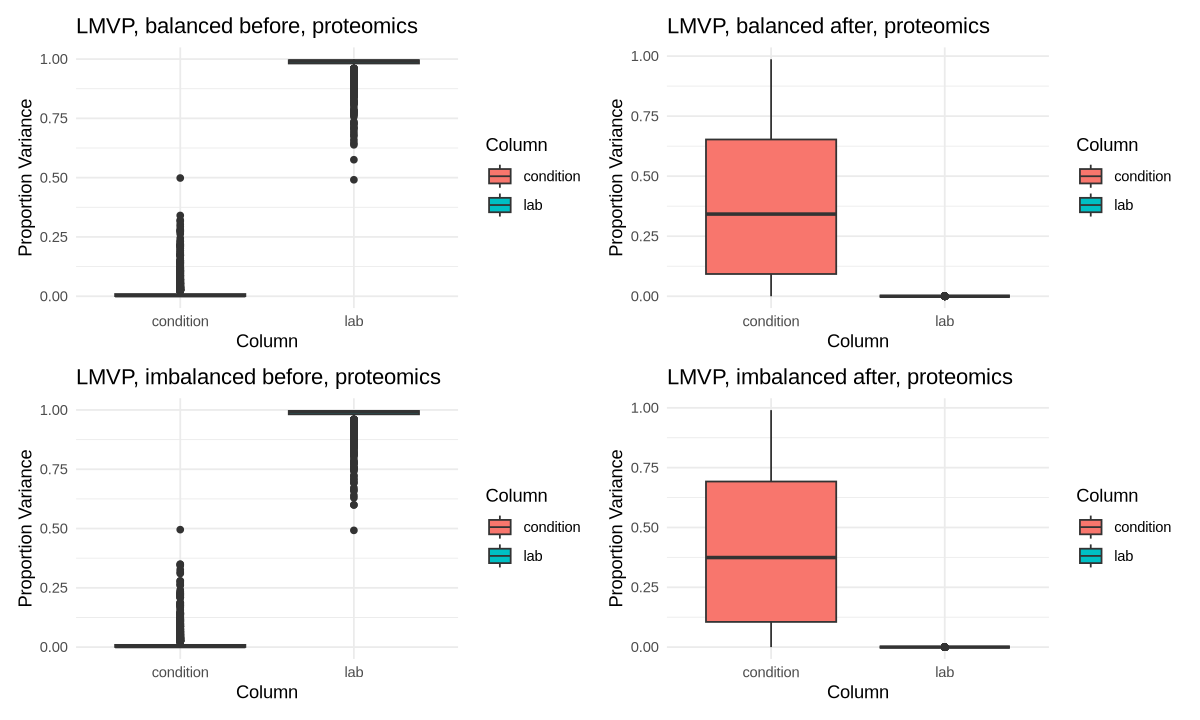

In [97]:
lmpv_plots_corrected <- list()
lmpv_plot_uncorrected <- list()

for(mode in c("balanced", "imbalanced")){
    lmpv_plots_corrected[[mode]] <- lmpv_plot(central_corrected[[mode]], metadata[[mode]], 
        title = paste("LMVP,", mode, "after, proteomics"))
    lmpv_plot_uncorrected[[mode]] <- lmpv_plot(central_uncorrected[[mode]], metadata[[mode]], 
        title = paste("LMVP,", mode, "before, proteomics"))
}

layout <- (lmpv_plot_uncorrected[['balanced']] + lmpv_plots_corrected[['balanced']]) /
            (lmpv_plot_uncorrected[['imbalanced']] + lmpv_plots_corrected[['imbalanced']])

options(repr.plot.width=10, repr.plot.height=6)
layout